## Plotly exploration
Learning how to visualize data in plotly and recreating familiar seaborn/matplotlib plots as interactive plotly figures.

In [1]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [2]:
pio.renderers.default = 'png'

In [3]:
plotly.__version__

'4.3.0'

In [4]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'png'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

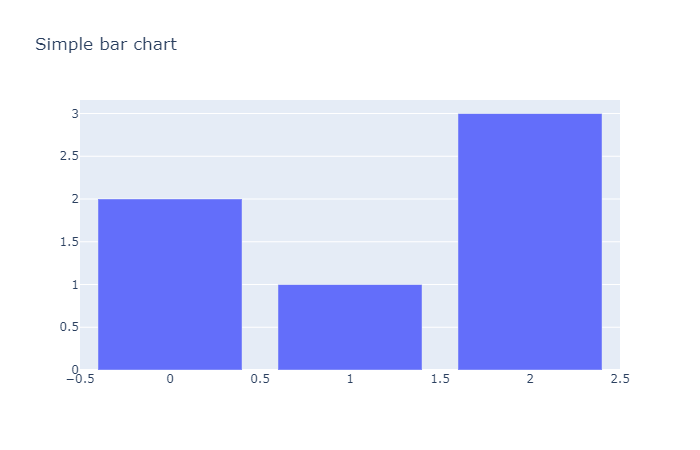

In [5]:
fig = go.Figure(
    data = [go.Bar(y = [2, 1, 3])],
    layout_title_text = "Simple bar chart"
)
fig.show()
#fig.write_html('first_figure.html', auto_open=True)

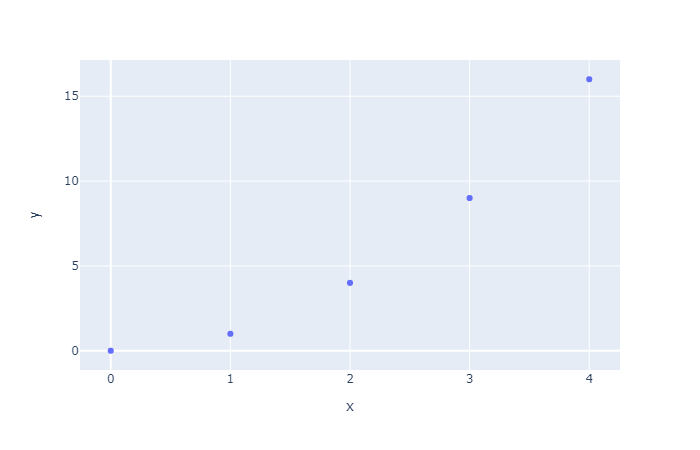

In [6]:
fig = px.scatter(x=[0, 1, 2, 3, 4], 
                 y=[0, 1, 4, 9, 16])
fig

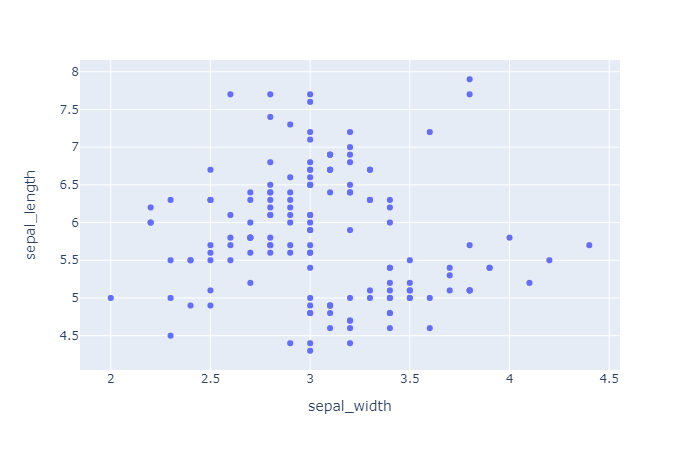

In [7]:
iris = px.data.iris()
fig = px.scatter(iris,
                 x="sepal_width",
                 y="sepal_length")
fig